### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

***OVERFITTNG IN DECISION TREES***

Decision trees are popular machine learning models used for both classification and regression tasks. They resemble human decision-making processes and are easy to visualize. Each node represents a decision based on a feature, making the model straightforward to interpret.

In this study we used the Whickham dataset to classify individuals as alive or dead based on their smoking status and age. 

***Why Decision trees?***
* Decision trees capture non-linear relationships between features and target variables, unlike linear models that assume a linear relationship.
* They provide insights into which features are most important for predicting the target variable. During the training process, decision trees automatically select the most important features and ignore the less relevant ones.
* Unlike many other algorithms, decision trees don’t require normalization or standardization of features, as they are not sensitive to the scale of the features.
* Can handle both numerical and categorical data and can be adapted to various types of problems by tuning parameters such as the depth of the tree or the minimum number of samples required to split a node.
* Decision trees can handle missing values by learning the best way to split the data at each node.

***Limitations***
* ***Overfitting:*** Decision trees can easily overfit the training data, especially if they grow too deep. Techniques like pruning, setting a maximum depth, or requiring a minimum number of samples per leaf can help mitigate this. Using Grid Search to tune hyperparameters allows us to find a balance between underfitting and overfitting by selecting the best max_depth, min_samples_leaf, and min_samples_split that helps in creating a model that generalizes well to new, unseen data.
* ***Instability:*** Small changes in the data can result in a completely different tree structure. Ensemble methods like Random Forests or Gradient Boosting can help address this issue by combining multiple trees.

***Consequences of Overfitting:***<br>
* ***Model Complexity:*** An overfitted model is too complex and captures noise in the training data, leading to poor generalization.
* ***Model Selection:*** To avoid overfitting, it's crucial to select a model that balances complexity and performance, often by using cross-validation to find an optimal max_depth.

In this study, we determined when a decision tree begins to overfit.<br>
***Data Preparation:*** Categorical variables (smoker, outcome) were converted into numerical variables and data split into varying training and test sets.<br>
***Model Training and Evaluation:*** Decision tree models with varying max_depth values from 1 to 10 were trained, computing the accuracy on both the training and test sets <br>
***Plotting:*** The results were plotted to visualize how accuracy changes with different max_depth values inorder to identify the point where the model starts to overfit.

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('data/Whickham.txt')

In [46]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [47]:
# Convert categorical variables to numerical
data['smoker'] = data['smoker'].map({'Yes': 1, 'No': 0})
data['outcome'] = data['outcome'].map({'Alive': 1, 'Dead': 0})

In [48]:
data

,outcome,smoker,age
0,1,1,23
1,1,1,18
2,0,1,71
3,1,0,67
4,1,0,64
...,...,...,...
1309,1,1,35
1310,1,0,33
1311,1,1,21
1312,1,0,46


In [49]:
X = data[['smoker', 'age']]
y = data['outcome']

In [50]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

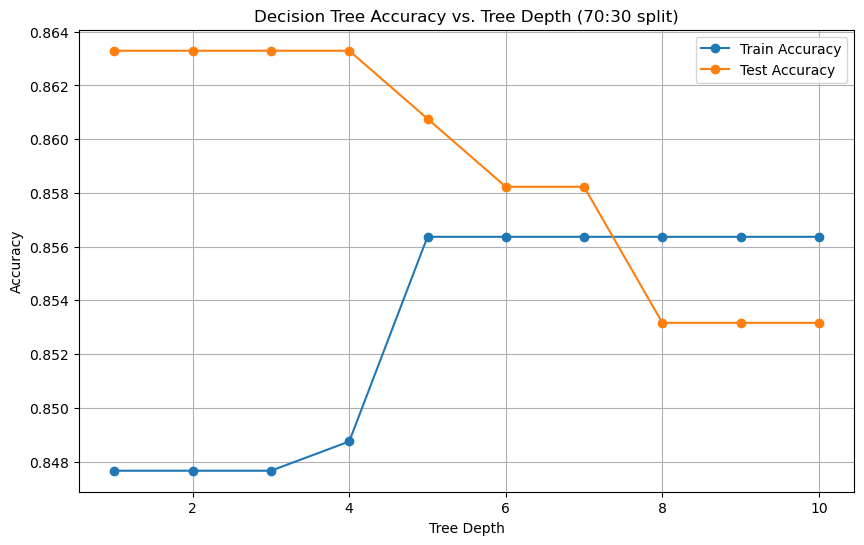

In [51]:
# Initialize lists to store results
depths = []
train_accuracies = []
test_accuracies = []

# Train decision trees with different max_depth values
for max_depth in range(1, 11):  
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Predict and evaluate accuracy
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    depths.append(max_depth)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Tree Depth (70:30 split)')
plt.legend()
plt.grid(True)
plt.show()


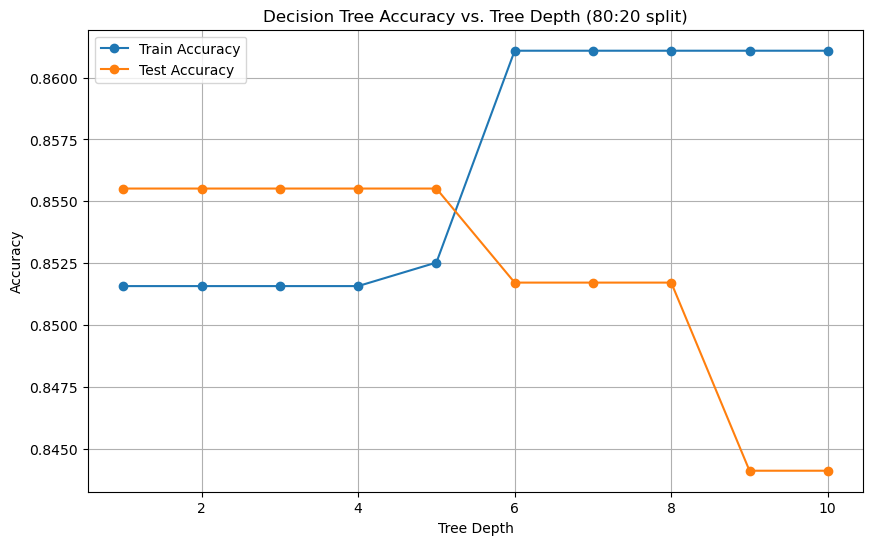

In [58]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize lists to store results
depths = []
train_accuracies = []
test_accuracies = []

# Train decision trees with different max_depth values
for max_depth in range(1, 11):  
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Predict and evaluate accuracy
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    depths.append(max_depth)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Tree Depth (80:20 split)')
plt.legend()
plt.grid(True)

# Save the plot
save_pat = r'C:\Users\Luswata\Dropbox\ML_AI_UCBerkeley\MODULE_14_DECISION_TREES\graphs\Acc_depth.png'
plt.savefig(save_pat)

plt.show()

***Interpretation:***  <br>
* ***Training Accuracy:*** Increases with tree depth. A deeper tree can fit the training data more precisely.<br>
* ***Test Accuracy:*** Increases up to a certain depth, after which it may start to decrease. This drop indicates overfitting, where the model performs well on training data but poorly on unseen test data.

***Finding the best hyperparameters using Grid Search***<br>
* 'max_depth':  None means the tree will expand until all leaves are pure
* 'min_samples_leaf': Minimum number of samples required to be at a leaf node
* 'min_samples_split': Minimum number of samples required to split an internal node

In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('data/Whickham.txt')
data['smoker'] = data['smoker'].map({'Yes': 1, 'No': 0})
data['outcome'] = data['outcome'].map({'Alive': 1, 'Dead': 0})
X = data[['smoker', 'age']]
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 7, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20, 25]
}

# Initialize GridSearchCV
dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Training Accuracy: 0.8476657163221667
Test Accuracy: 0.8632911392405064


***Results***<br>
* ***Best Parameters:*** The combination of max_depth, min_samples_leaf, and min_samples_split that yields the highest accuracy on cross-validation is:<br>
  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
* ***Training Accuracy:*** The best score from cross-validation, showing how well the model performs on the training data with the selected hyperparameters is 0.85.
* ***Test Accuracy:***  The model's performance on unseen data, indicating how well it generalizes is 0.86.

***Fitting a Decision Tree Classifier with specific hyperparameters; max_depth=3, min_samples_leaf=1, and min_samples_split=2***

In [54]:
# Initialize the Decision Tree Classifier with specified hyperparameters
dtree = DecisionTreeClassifier(
    max_depth=3, 
    min_samples_leaf=1, 
    min_samples_split=2,
    random_state=42
)

# Fit the model to the training data
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
# Predict on training data
y_train_pred = dtree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = dtree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.85
Test Accuracy: 0.86


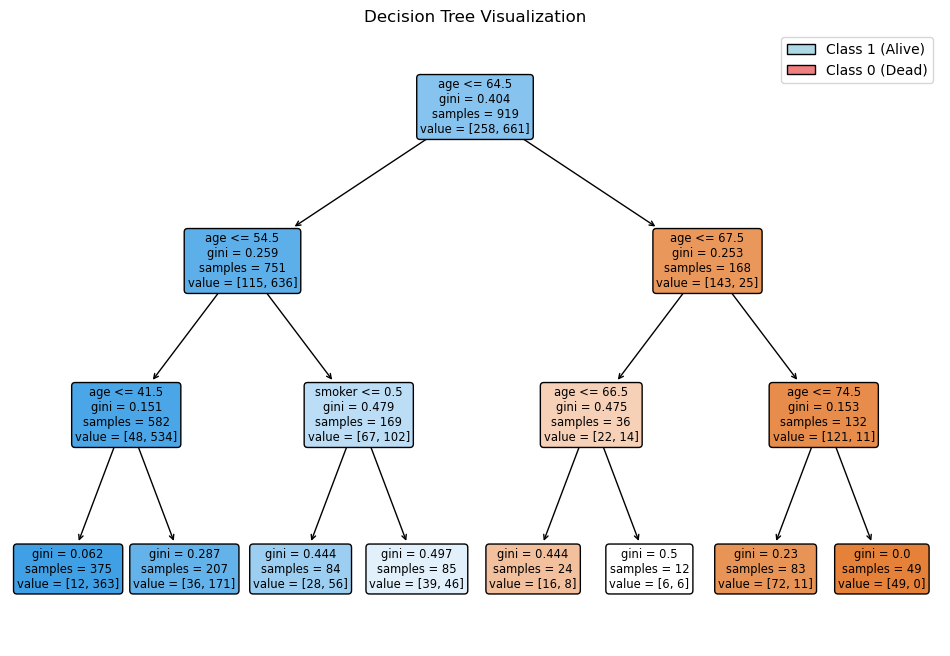

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')

# Manually add a legend
# Define colors based on the class labels
from matplotlib.patches import Patch

# Define the colors you want to use for the legend
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Class 1 (Alive)'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Class 0 (Dead)')
]

# Create the legend
plt.legend(handles=legend_elements, loc='best')

# Save the plot
save_path = r'C:\Users\Luswata\Dropbox\ML_AI_UCBerkeley\MODULE_14_DECISION_TREES\graphs\decision_tree.png'
plt.savefig(save_path)

plt.show()

In [57]:
# Export and print the text version of the tree
tree_text = export_text(dtree, feature_names=X.columns.tolist())
print(tree_text)

|--- age <= 64.50
|   |--- age <= 54.50
|   |   |--- age <= 41.50
|   |   |   |--- class: 1
|   |   |--- age >  41.50
|   |   |   |--- class: 1
|   |--- age >  54.50
|   |   |--- smoker <= 0.50
|   |   |   |--- class: 1
|   |   |--- smoker >  0.50
|   |   |   |--- class: 1
|--- age >  64.50
|   |--- age <= 67.50
|   |   |--- age <= 66.50
|   |   |   |--- class: 0
|   |   |--- age >  66.50
|   |   |   |--- class: 0
|   |--- age >  67.50
|   |   |--- age <= 74.50
|   |   |   |--- class: 0
|   |   |--- age >  74.50
|   |   |   |--- class: 0



***Summary*** <br>
***For ages ≤ 64.50:***

* If age ≤ 54.50, then if age ≤ 41.50, the prediction is class 1 (Alive); if age > 41.50 but ≤ 54.50, the prediction is still class 1 (Alive).
* If age > 54.50, the prediction is class 1 (Alive) regardless of smoking status.

***For ages > 64.50:***

* If age ≤ 67.50, the prediction is class 0 (Dead), regardless of whether age is ≤ 66.50 or > 66.50.
* If age > 67.50, the prediction is class 0 (Dead) regardless of whether age is ≤ 74.50 or > 74.50.